## Polling Data
WWCode Hackathon 

@Capital Factory 

Sep 15-17, 2017

Victoria ODell

Hector

Beth Qiang

Claudia Castro

GitHub library

https://github.com/bethqiang/travis-county-historical-polling-locations

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# read booking and action training data
data2016 = pd.read_csv('Polling Data - 2016.csv',sep=',')
data2015 = pd.read_csv('Polling Data - 2015.csv',sep=',')
data2014 = pd.read_csv('Polling Data - 2014.csv',sep=',')

data_all = pd.read_csv('data_merged.csv')

data2016.head()


,Year,Name,Address,Neighborhood,Neighborhood (Spanish),Precinct(s),Mega Site,Early Voting,Election Day Voting
0,2016,ACC Highland Mall,6001 Airport Blvd.,North,Norte,156,True,True,True
1,2016,Ben Hur Shrine Center,7811 Rockwood Ln.,West,Oeste,243,True,True,True
2,2016,Southpark Meadows,9600 IH-35 South,South,Sur,411,True,True,True
3,2016,Millennium Youth Complex,1156 Hargrave St.,East,Este,124,True,True,True
4,2016,Austin City Hall,301 W 2nd St.,Central,Central,"325, 329",False,True,True


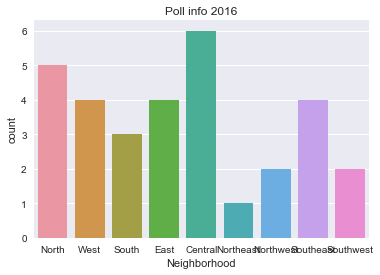

In [55]:
ax2 = plt.axes()
sns.countplot(x="Neighborhood", data = data2016 );
ax2.set_title('Poll info 2016')
plt.show()

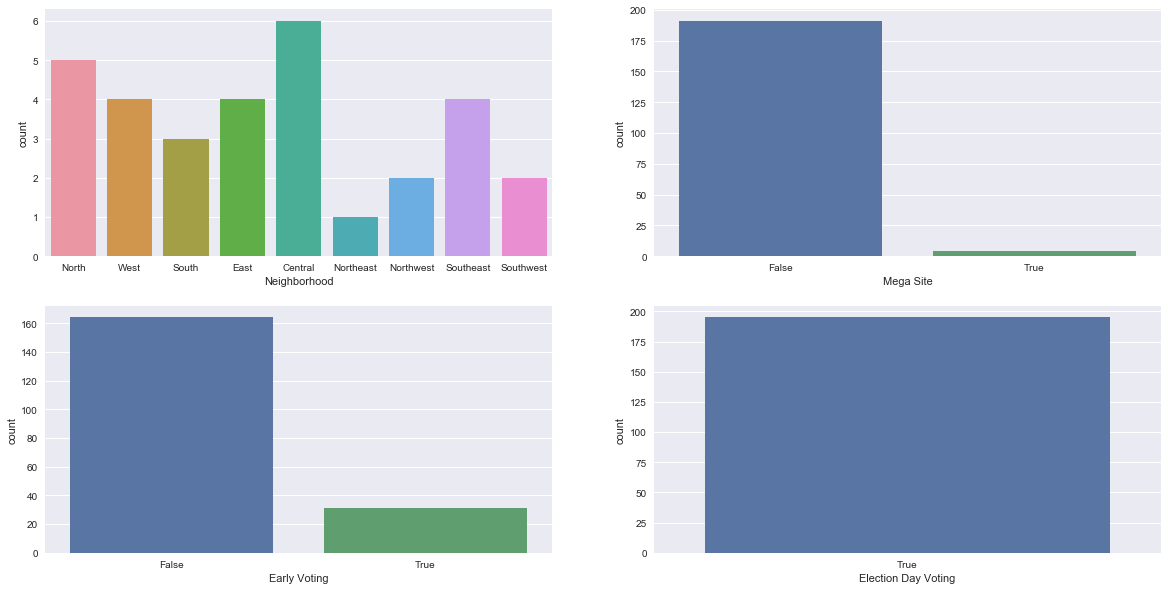

In [56]:
plain_features = ['Neighborhood', 'Mega Site','Early Voting', 'Election Day Voting']
fig, ax = plt.subplots(nrows = 2, ncols = 2 ,figsize=(20,10))
start = 0
for j in range(2):
    for i in range(2):
        if start == len(plain_features):
            break
        sns.countplot(x=plain_features[start], data=data2016, ax=ax[j,i])
        start += 1

In [57]:
data2015.head()

,Year,Name,Address,Neighborhood,Neighborhood (Spanish),Precinct(s),Mega Site,Early Voting,Election Day Voting
0,2015,Travis County Airport Boulevard Offices,5501 Airport Blvd.,Central,Central,142,False,True,True
1,2015,Fiesta Mart Central in Delwood Shopping Center,3909 North IH-35,Central,Central,NaN,False,True,True
2,2015,Howson Public Library,2500 Exposition Blvd.,Central,Central,256,False,True,True
3,2015,H.M. Sweatt Travis County Courthouse,"1000 Guadalupe St., 1st Fl.",Central,Central,329,False,True,True
4,2015,University of Texas Flawn Academic Center (Lobby),2400 Inner Campus Dr.,Central,Central,"208, 277",False,True,True


In [58]:
data2014.head()

,Year,Name,Address,Neighborhood,Neighborhood (Spanish),Precinct(s),Mega Site,Early Voting,Election Day Voting
0,2014,Carver Museum Complex,1165 Angelina St.,East,Este,124,False,True,True
1,2014,Ben Hur Shrine Center,7811 Rockwood Ln.,North,Norte,243,False,True,True
2,2014,Randalls Steiner Ranch,5145 RM 620 North,Northwest,Noroeste,244,False,True,True
3,2014,Randalls Lakeway,2301 RR 620 South,West,Oeste,320,False,True,True
4,2014,Randalls Research and Braker,10900-D Research Blvd.,Northwest,Noroeste,323,False,True,True


In [59]:
data2016.describe()

,Year
count,195.0
mean,2016.0
std,0.0
min,2016.0
25%,2016.0
50%,2016.0
75%,2016.0
max,2016.0


## Transform feature: Address
boulevard -> Blvd.

Street -> St.

Drive -> Dr.

Avenue -> Ave.

Parkway -> Pkwy.

Lane -> ln.

In [60]:
data2014.head()

,Year,Name,Address,Neighborhood,Neighborhood (Spanish),Precinct(s),Mega Site,Early Voting,Election Day Voting
0,2014,Carver Museum Complex,1165 Angelina St.,East,Este,124,False,True,True
1,2014,Ben Hur Shrine Center,7811 Rockwood Ln.,North,Norte,243,False,True,True
2,2014,Randalls Steiner Ranch,5145 RM 620 North,Northwest,Noroeste,244,False,True,True
3,2014,Randalls Lakeway,2301 RR 620 South,West,Oeste,320,False,True,True
4,2014,Randalls Research and Braker,10900-D Research Blvd.,Northwest,Noroeste,323,False,True,True


In [61]:
data2014.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186 entries, 0 to 185
Data columns (total 9 columns):
Year                      186 non-null int64
Name                      186 non-null object
Address                   186 non-null object
Neighborhood              21 non-null object
Neighborhood (Spanish)    21 non-null object
Precinct(s)               182 non-null object
Mega Site                 186 non-null bool
Early Voting              186 non-null bool
Election Day Voting       186 non-null bool
dtypes: bool(3), int64(1), object(5)
memory usage: 9.3+ KB


In [62]:
# cast address info as string data
data2016[['Address']] = data2016[['Address']].astype(str)
data2015[['Address']] = data2016[['Address']].astype(str)
data2014[['Address']] = data2016[['Address']].astype(str)

# Look for the following keywords on Address column, if thet are spelled out, transform it to its abreviation
plain_features = ['Boulevard', 'Street','Drive', 'Avenue','Parkway','Lane']
start = 0
print "-------------------------------------------"
print("              2016  2015   2014")
print "-------------------------------------------"
for i in range(len(plain_features)):
    print(plain_features[start])
    print("       " ,data2016['Address'].str.contains(plain_features[start]).any(),
                     data2015['Address'].str.contains(plain_features[start]).any(),
                     data2014['Address'].str.contains(plain_features[start]).any())
    start += 1

-------------------------------------------
              2016  2015   2014
-------------------------------------------
Boulevard
('       ', False, False, False)
Street
('       ', False, False, False)
Drive
('       ', False, False, False)
Avenue
('       ', False, False, False)
Parkway
('       ', False, False, False)
Lane
('       ', False, False, False)


## Transform feature: Precinct(s)
Separate entries with commas

If there is more than one there will be a comma,

if there is check if next caracter is a space

    if yes, do nothing
    
    if not, insert space

In [63]:
print("Precinct(s) \n 2016",data2016['Precinct(s)'].str.contains(',').any())
print("               2015",data2016['Precinct(s)'].str.contains(',').any())
print("               2014",data2016['Precinct(s)'].str.contains(',').any())

('Precinct(s) \n 2016', True)
('               2015', True)
('               2014', True)


In [64]:
#Access entries with commas, 
#first get rid of existing single space
data2016['Precinct(s)'].str.replace(' ', '');
data2015['Precinct(s)'].str.replace(' ', '');
data2014['Precinct(s)'].str.replace(' ', '');

#insert a space after each comma
data2016['Precinct(s)'].str.replace(',', ', ');
data2015['Precinct(s)'].str.replace(',', ', ');
data2014['Precinct(s)'].str.replace(',', ', ');

print("Precinct(s) \n 2016",data2016['Precinct(s)'].str.contains(', ').any())
print("               2015",data2016['Precinct(s)'].str.contains(', ').any())
print("               2014",data2016['Precinct(s)'].str.contains(', ').any())

('Precinct(s) \n 2016', True)
('               2015', True)
('               2014', True)


In [65]:
data2016.head(20)

,Year,Name,Address,Neighborhood,Neighborhood (Spanish),Precinct(s),Mega Site,Early Voting,Election Day Voting
0,2016,ACC Highland Mall,6001 Airport Blvd.,North,Norte,156,True,True,True
1,2016,Ben Hur Shrine Center,7811 Rockwood Ln.,West,Oeste,243,True,True,True
2,2016,Southpark Meadows,9600 IH-35 South,South,Sur,411,True,True,True
3,2016,Millennium Youth Complex,1156 Hargrave St.,East,Este,124,True,True,True
4,2016,Austin City Hall,301 W 2nd St.,Central,Central,"325, 329",False,True,True
5,2016,Fiesta Mart Central in Delwood Shopping Center,3909 North IH-35,Central,Central,NaN,False,True,True
6,2016,Howson Public Library,2500 Exposition Blvd.,Central,Central,"256, 266",False,True,True
7,2016,Travis County Granger Building,"314 W 11th St., 1st Floor",Central,Central,329,False,True,True
8,2016,University of Texas Flawn Academic Center (Lobby),2400 Inner Campus Dr.,Central,Central,208,False,True,True
9,2016,Goodwill Community Center,1015 Norwood Park Blvd.,Central,Central,139,False,True,True


In [66]:
# Write data to disk again!
data2016.to_csv('data2016.csv', index = False, sep=',')
data2015.to_csv('data2015.csv', index = False, sep=',')
data2014.to_csv('data2014.csv', index = False, sep=',')

In [67]:
filenames = ["data2016.csv", "data2015.csv","data2014.csv"] # Fill in remaining files.
df = pd.DataFrame()

for filename in filenames:
    df = df.append(pd.read_csv(filename))

In [68]:
df.to_csv('data_merged.csv', index = False, sep=',')

In [69]:
df.head(20)

,Year,Name,Address,Neighborhood,Neighborhood (Spanish),Precinct(s),Mega Site,Early Voting,Election Day Voting
0,2016,ACC Highland Mall,6001 Airport Blvd.,North,Norte,156,True,True,True
1,2016,Ben Hur Shrine Center,7811 Rockwood Ln.,West,Oeste,243,True,True,True
2,2016,Southpark Meadows,9600 IH-35 South,South,Sur,411,True,True,True
3,2016,Millennium Youth Complex,1156 Hargrave St.,East,Este,124,True,True,True
4,2016,Austin City Hall,301 W 2nd St.,Central,Central,"325, 329",False,True,True
5,2016,Fiesta Mart Central in Delwood Shopping Center,3909 North IH-35,Central,Central,NaN,False,True,True
6,2016,Howson Public Library,2500 Exposition Blvd.,Central,Central,"256, 266",False,True,True
7,2016,Travis County Granger Building,"314 W 11th St., 1st Floor",Central,Central,329,False,True,True
8,2016,University of Texas Flawn Academic Center (Lobby),2400 Inner Campus Dr.,Central,Central,208,False,True,True
9,2016,Goodwill Community Center,1015 Norwood Park Blvd.,Central,Central,139,False,True,True
